In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [302]:
df = pd.read_csv("C:/Users/rouna/OneDrive/Documents/MachineLearning/Dataset/tip.csv")

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [304]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [305]:
df.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [306]:
shape = df.shape
print(shape)

(244, 7)


<Axes: xlabel='tip'>

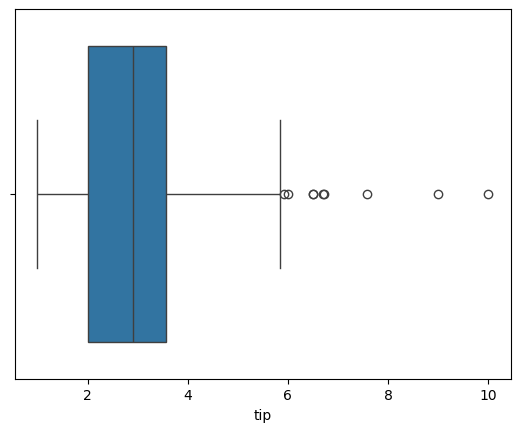

In [307]:
sns.boxplot(data=df, x='tip')

smoker  sex   
No      Male      97
        Female    54
Yes     Male      60
        Female    33
Name: count, dtype: int64


<BarContainer object of 4 artists>

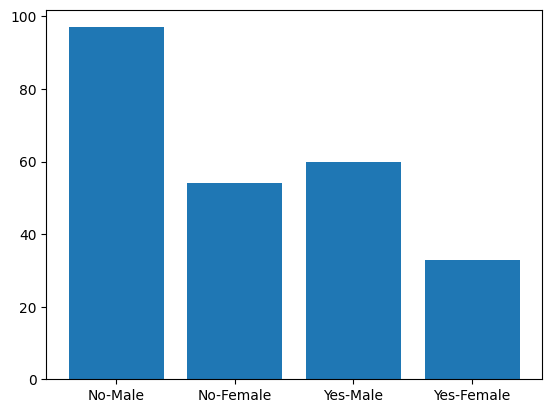

In [308]:
smoker = df.groupby('smoker')['sex'].value_counts()
print(smoker)

label = [f'{smoker}-{sex}' for smoker, sex in smoker.index]
plt.bar(label, smoker.values)

In [309]:
df_copy = df.copy()
df_copy.drop('sex', axis=1, inplace=True)
df_copy.drop('smoker', axis=1, inplace=True)
df_copy.drop('day', axis=1, inplace=True)
df_copy.drop('time', axis=1, inplace=True)
df_copy

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [310]:
x = df_copy.iloc[:, :-1]
y = df_copy.iloc[:, -1]
X_train, X_text, y_train, y_text = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape, X_text.shape, y_train.shape, y_text.shape)

(195, 2) (49, 2) (195,) (49,)


In [311]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_text = scaler.transform(X_text)
print(X_train.shape, X_text.shape, y_train.shape, y_text.shape)

(195, 2) (49, 2) (195,) (49,)


In [312]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.predict(X_text))
print(lr.predict_proba(X_text))

0.6820512820512821
[2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2
 2 4 2 2 2 2 4 2 2 2 2 2]
[[8.30640976e-03 7.61694764e-01 1.21636757e-01 9.31646958e-02
  1.15212675e-02 3.67610605e-03]
 [4.16471732e-03 6.70520090e-01 1.61454842e-01 1.41088286e-01
  1.50371545e-02 7.73491024e-03]
 [4.15396641e-03 6.56268502e-01 1.67249270e-01 1.47860164e-01
  1.66680037e-02 7.80009330e-03]
 [4.70265972e-02 9.08554559e-01 2.86934304e-02 1.36677006e-02
  1.79557373e-03 2.62139285e-04]
 [1.02555532e-02 7.95500381e-01 1.05452309e-01 7.65395186e-02
  9.44430244e-03 2.80793612e-03]
 [5.29973468e-02 9.09890192e-01 2.43856285e-02 1.11001954e-02
  1.42180697e-03 2.04830400e-04]
 [6.33155070e-03 7.27436400e-01 1.37328580e-01 1.10959064e-01
  1.29552708e-02 4.98913569e-03]
 [6.30532258e-04 3.55595544e-01 2.61188981e-01 3.20427641e-01
  2.83613898e-02 3.37959118e-02]
 [4.89788397e-03 6.93193559e-01 1.52110488e-01 1.29004195e-01
  1.42375066e-02 6.55636804e-03]
 [3.65477901e-04 2.056592

In [313]:
confusion_matrix = confusion_matrix(y_text, lr.predict(X_text))
print(confusion_matrix)

[[ 0  2  0  0  0  0]
 [ 0 31  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  2  0  3  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  1  0  0]]
